<a href="https://colab.research.google.com/github/Some7hing0riginal/lighthouselabs-midterm1/blob/main/Mid_Term_pickle%20time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timezone
import time
import pytz
from sqlalchemy import create_engine
from oauth2client.client import GoogleCredentials
from google.colab import drive
from google.colab import auth
auth.authenticate_user()
import gspread


zone_mtl = pytz.timezone('America/Montreal')
date_mtl = datetime.now(zone_mtl)
date_mtl
gs_row=1
gs_col=1



gc = gspread.authorize(GoogleCredentials.get_application_default())
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1C5CKkVvInTiP9XRtuSjjgvSDu-a7RNgwhNQtjAYrWXI/edit#gid=0')
worksheet = wb.add_worksheet(title='LOG-'+str(date_mtl), rows="100", cols="20")


drive.mount('/gdrive') # you may have to authentificate , follow the process of the browser window
#change this
# file_path = '/gdrive/MyDrive/lhl/Mid_Term/flights_2019.csv'
training_file_path ='/gdrive/MyDrive/lhl/Mid_Term/flights_18-19_OCT_NOV_DEC_RIGHT_BEFORE_TRAINING.csv'
test_file_path = '/gdrive/MyDrive/lhl/Mid_Term/flights_test_final_df.csv'
# df = pd.read_csv(file_path,header=0,skiprows=range(1,6000000),nrows=3000000)
df = pd.read_csv(training_file_path,index_col=0)#
df_test = pd.read_csv(test_file_path,index_col=0)#

features_list_o=['destPrecipMM','origPrecipMM','origVisibility','destVisibility','destWeatherCode','origWeatherCode','origAvgTempC','destAvgTempC','dest_airport_id','origin_airport_id','tail_num','distance','crs_elapsed_time',"crs_dep_time", "crs_arr_time"]
df_test=df_test[['destPrecipMM','origPrecipMM','dayofweek_num','origVisibility','destVisibility','destWeatherCode','origWeatherCode','origAvgTempC','destAvgTempC','dest_airport_id','origin_airport_id','tail_num','distance','crs_elapsed_time',"crs_dep_time", "crs_arr_time"]]

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


# correlation

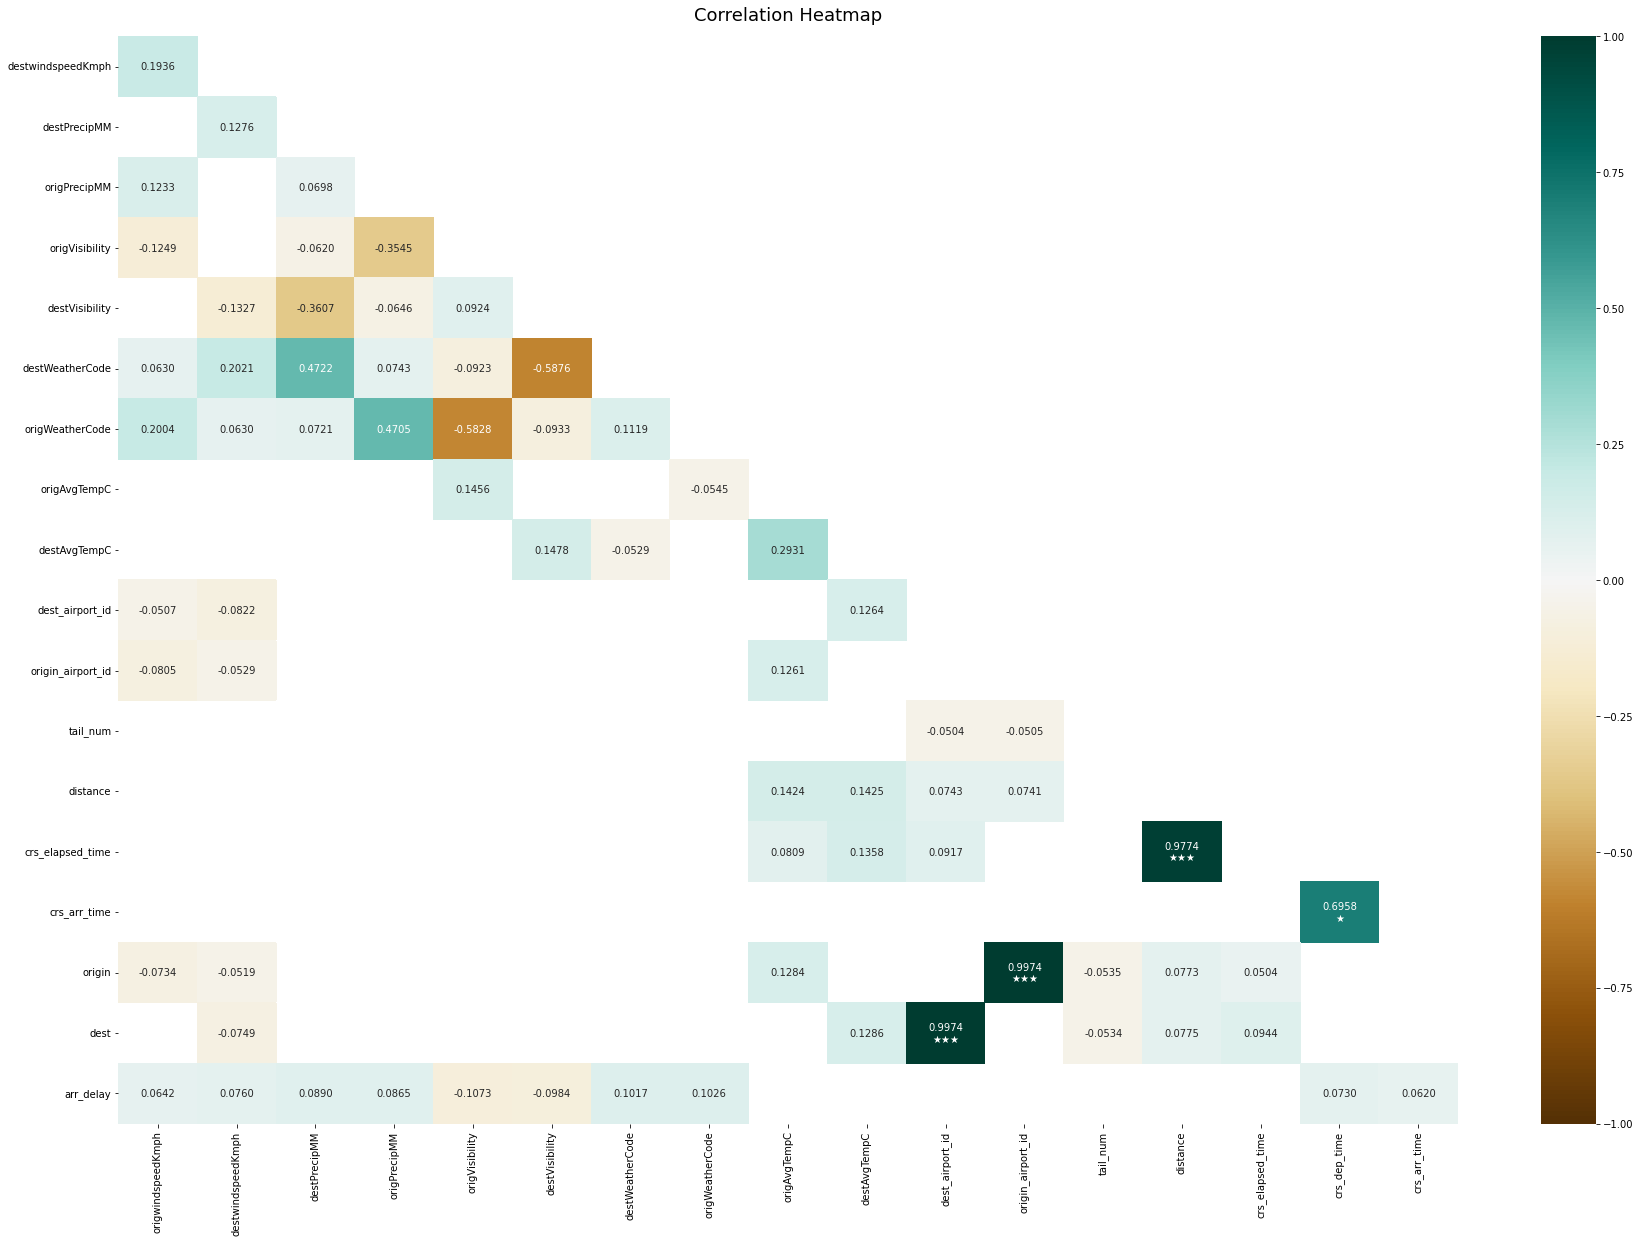

In [2]:
code_block_name = "Correlation HeatMap "
dateTimeObj = datetime.now()
worksheet.update_cell(gs_row,gs_col,code_block_name)
worksheet.update_cell(gs_row,gs_col+1,'Started')
worksheet.update_cell(gs_row,gs_col+2,str(dateTimeObj))

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
dfFinal = df[['origwindspeedKmph','dayofweek_num','destwindspeedKmph','destPrecipMM','origPrecipMM','origVisibility','destVisibility','destWeatherCode','origWeatherCode','origAvgTempC','destAvgTempC','dest_airport_id','origin_airport_id','tail_num','distance','crs_elapsed_time',"crs_dep_time", "crs_arr_time", "fl_date", "origin", "dest", "arr_delay"]]

corrMatrix = dfFinal.corr()

# ndf = df.loc[df.max(axis=1) > 0.30, df.max(axis=0) > 0.30]

# sns.heatmap(ndf)
# plt.show()
# sn.set(rc = {'figure.figsize':(10,6)})
# sn.heatmap(corrMatrix, annot=False)
plt.figure(figsize=(30, 20))
mask = np.triu(np.ones_like(corrMatrix, dtype=np.bool))
cut_off = 0.05  # only show cells with abs(correlation) at least this value
extreme_1 = 0.65  # show with a star
extreme_2 = 0.85  # show with a second star
extreme_3 = 0.95  # show with a third star
mask |= np.abs(corrMatrix) < cut_off
corrMatrix = corrMatrix[~mask]  # fill in NaN in the non-desired cells

remove_empty_rows_and_cols = True
if remove_empty_rows_and_cols:
    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
    corrMatrix = corrMatrix.iloc[wanted_cols, wanted_rows]

annot = [[f"{val:.4f}"
          + ('' if abs(val) < extreme_1 else '\n★')  # add one star if abs(val) >= extreme_1
          + ('' if abs(val) < extreme_2 else '★')  # add an extra star if abs(val) >= extreme_2
          + ('' if abs(val) < extreme_3 else '★')  # add yet an extra star if abs(val) >= extreme_3
          for val in row] for row in corrMatrix.to_numpy()]
heatmap = sns.heatmap(corrMatrix, vmin=-1, vmax=1, annot=annot, fmt='', cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=16)

plt.show()

dateTimeObj = datetime.now()
worksheet.update_cell(gs_row,gs_col+3,'Finished')
worksheet.update_cell(gs_row,gs_col+4,str(dateTimeObj))
gs_row += 1


# Distribution


In [3]:
dfFinal

,origwindspeedKmph,dayofweek_num,destwindspeedKmph,destPrecipMM,origPrecipMM,origVisibility,destVisibility,destWeatherCode,origWeatherCode,origAvgTempC,destAvgTempC,dest_airport_id,origin_airport_id,tail_num,distance,crs_elapsed_time,crs_dep_time,crs_arr_time,fl_date,origin,dest,arr_delay
0,15,6,6,0.0,0.0,10,7,119,122,3,-17,13487,13851,3206,694,126.0,945,1151,2019-12-15,246,237,2.0
1,10,6,4,0.0,0.0,10,10,113,113,20,-4,14869,14683,1364,1087,187.0,800,1007,2019-12-15,303,324,-4.0
2,3,6,9,0.0,0.3,10,10,113,353,4,10,14893,14747,1170,605,120.0,938,1138,2019-12-15,313,326,-27.0
3,10,6,3,0.1,0.0,10,9,176,113,10,4,14747,14893,1170,605,128.0,1213,1421,2019-12-15,326,313,-8.0
4,9,6,6,0.0,0.0,10,10,119,113,-8,-17,13487,13485,705,228,78.0,1201,1319,2019-12-15,235,237,-13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2587140,1,6,3,0.0,0.0,2,10,113,143,3,-4,14869,13264,1306,575,125.0,555,900,2019-12-15,219,324,-29.0
2587141,23,6,14,0.0,0.0,9,10,113,119,-1,6,12264,11433,4683,383,101.0,725,906,2019-12-15,100,162,-11.0
2587142,14,6,20,0.0,0.0,10,9,122,113,6,-1,11433,12264,4683,383,102.0,947,1129,2019-12-15,162,100,-3.0
2587143,7,6,8,0.1,0.0,7,6,335,116,-17,-17,14633,13487,3206,76,65.0,2234,2339,2019-12-15,237,299,-18.0


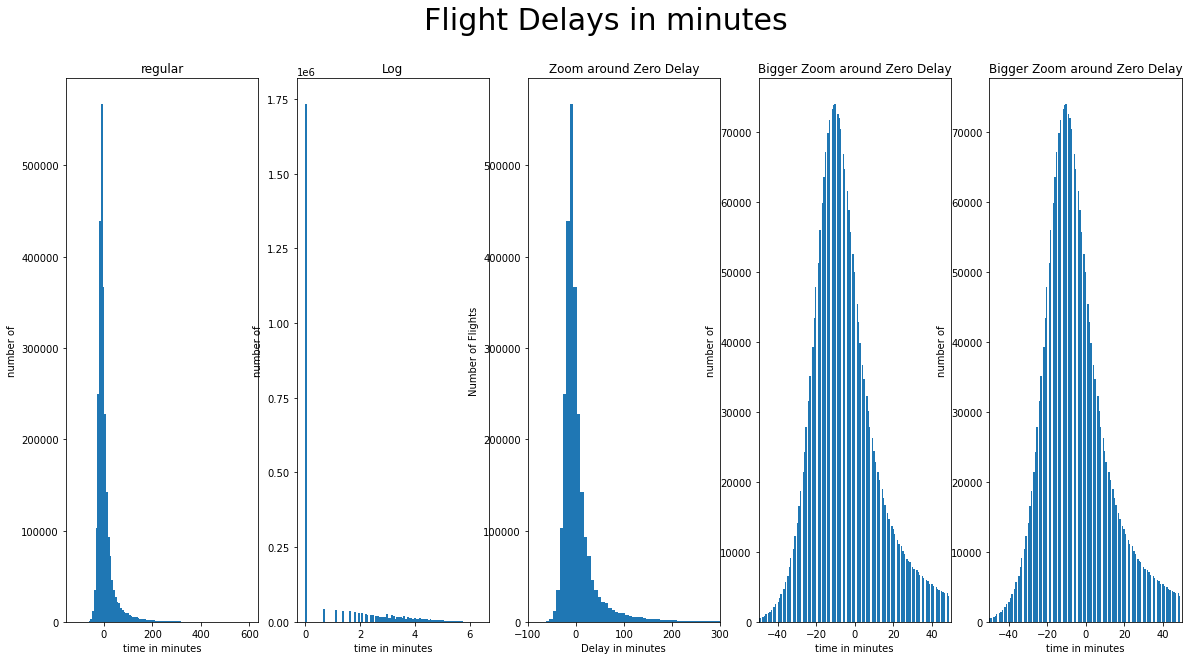

In [4]:
code_block_name = "Distribution Graph "
dateTimeObj = datetime.now()
worksheet.update_cell(gs_row,gs_col,code_block_name)
worksheet.update_cell(gs_row,gs_col+1,'Started')
worksheet.update_cell(gs_row,gs_col+2,str(dateTimeObj))


#histogram to visualize different distributions. 
#regular, Log, Zoom close to 0, Big zoom close to 0.
fig, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(1, 5,figsize=(20, 10))


ax1.set_xlabel('time in minutes')
ax1.set_ylabel('number of')
ax1.set_title('regular')
ax1.hist(df['arr_delay'], bins=100)



ax2.set_xlabel('time in minutes')
ax2.set_ylabel('number of')
ax2.set_title('Log')
ax2.hist(np.log(df['arr_delay'].clip(1,1000)), bins=100)
# to make the model work better, need normal distribution, so think about logging what will be predicted.
#Then inverse of the log. take the exponent.  np.exp.  ( order of the delay, minutes, hours, days )

#np.exp(log) = arrival delay



ax3.set_xlabel('Delay in minutes')
ax3.set_ylabel('Number of Flights')
ax3.set_title('Zoom around Zero Delay')
ax3.hist(df['arr_delay'], bins=100)
ax3.set_xlim(-100, 300)
fig.suptitle('Flight Delays in minutes', fontsize=30)


ax4.set_xlabel('time in minutes')
ax4.set_ylabel('number of')
ax4.set_title('Bigger Zoom around Zero Delay')
ax4.hist(df['arr_delay'], bins=1000)
ax4.set_xlim(-50, 50)
fig.suptitle('Flight Delays in minutes', fontsize=30)
fig.show


ax5.set_xlabel('time in minutes')
ax5.set_ylabel('number of')
ax5.set_title('Bigger Zoom around Zero Delay')
ax5.hist(df['arr_delay'], bins=1000)
ax5.set_xlim(-50, 50)
fig.suptitle('Flight Delays in minutes', fontsize=30)
fig.show



dateTimeObj = datetime.now()
worksheet.update_cell(gs_row,gs_col+3,'Finished')
worksheet.update_cell(gs_row,gs_col+4,str(dateTimeObj))
gs_row += 1


In [5]:


def train_test_split(df,features_list,target,gs_row,worksheet):
    
    
    from sklearn.model_selection import train_test_split# Import train_test_split function
    gs_col =1
    code_block_name = "train_test_split"
    dateTimeObj = datetime.now()
    worksheet.update_cell(gs_row,gs_col,code_block_name)
    worksheet.update_cell(gs_row,gs_col+1,'Started')
    worksheet.update_cell(gs_row,gs_col+2,str(dateTimeObj))

    X=df[features_list]  # Features
    y=df[target]  # Target
    import statsmodels.api as sm
    X = sm.add_constant(X)
    print(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
    
    dateTimeObj = datetime.now()
    worksheet.update_cell(gs_row,gs_col+3,'Finished')
    worksheet.update_cell(gs_row,gs_col+4,str(dateTimeObj))
    

    return X_train, X_test, y_train, y_test

def train_model(X_train,y_train,gs_row,worksheet):
   
    gs_col =1
    code_block_name = "train_model sm.OLS(y_train,X_train)"
    dateTimeObj = datetime.now()
    worksheet.update_cell(gs_row,gs_col,code_block_name)
    worksheet.update_cell(gs_row,gs_col+1,'Started')
    worksheet.update_cell(gs_row,gs_col+2,str(dateTimeObj))
   
    
    import statsmodels.api as sm
    print("lin_reg = sm.OLS(X_train,y_train)")
    lin_reg = sm.OLS(y_train.astype(float),X_train.astype(float)) #OLS is the most popular.
    print("model = lin_reg.fit()")
    model = lin_reg.fit()
    print("print_model = model.summary()")
    print_model = model.summary()
    print(print_model)
   
   
    from sklearn.linear_model import LinearRegression
   
    gs_col =1
    code_block_name = "train_model regressor = LinearRegression()"
    dateTimeObj = datetime.now()
    worksheet.update_cell(gs_row,gs_col,code_block_name)
    worksheet.update_cell(gs_row,gs_col+1,'Started')
    worksheet.update_cell(gs_row,gs_col+2,str(dateTimeObj))

    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    print("regressor.coef_")
    print(regressor.coef_)
    print(regressor.score(X_train,y_train))
    
    gs_col =1
    code_block_name = "train_model  = RandomForestRegressor()"
    dateTimeObj = datetime.now()
    worksheet.update_cell(gs_row,gs_col,code_block_name)
    worksheet.update_cell(gs_row,gs_col+1,'Started')
    worksheet.update_cell(gs_row,gs_col+2,str(dateTimeObj))


    from sklearn.ensemble import RandomForestRegressor

    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    dateTimeObj = datetime.now()
    worksheet.update_cell(gs_row,gs_col+3,'Finished')
    worksheet.update_cell(gs_row,gs_col+4,str(dateTimeObj))
 

    return model


def predict_results(model,X_train,gs_row,worksheet):
    gs_col =1
    code_block_name = "predict_results"
    dateTimeObj = datetime.now()
    worksheet.update_cell(gs_row,gs_col,code_block_name)
    worksheet.update_cell(gs_row,gs_col+1,'Started')
    worksheet.update_cell(gs_row,gs_col+2,str(dateTimeObj))
    
    y_pred=model.predict(X_train)
    
    dateTimeObj = datetime.now()
    worksheet.update_cell(gs_row,gs_col+3,'Finished')
    worksheet.update_cell(gs_row,gs_col+4,str(dateTimeObj))
    

    return y_pred

def score_this(model,y_train,y_pred,features_list,gs_row,worksheet):
    

    gs_col =1
    #Import scikit-learn metrics module for accuracy calculation
    from sklearn.metrics import r2_score
    # Model Accuracy, how often is the classifier correct?
    ModelAccuracy =("Accuracy:",r2_score(y_train, y_pred))

    #Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y)-1)/(len(y)-X.shape[1]-1)
 
    import time
    import numpy as np
    from sklearn import metrics
   
    Mean_Absolute_Error = metrics.mean_absolute_error(y_train, y_pred)  
    Mean_Squared_Error = metrics.mean_squared_error(y_train, y_pred)  
    Root_Mean_Squared_Error = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
    
    print("Mean_Absolute_Error")
    print(Mean_Absolute_Error)
    print("Mean_Squared_Error")
    print(Mean_Absolute_Error)
    print("Root_Mean_Squared_Error")
    print(Root_Mean_Squared_Error)

    worksheet.update_cell(gs_row,gs_col,str(ModelAccuracy))
    worksheet.update_cell(gs_row+1,gs_col,str(Mean_Absolute_Error))
    worksheet.update_cell(gs_row+2,gs_col,str(Mean_Squared_Error))
    worksheet.update_cell(gs_row+3,gs_col,str(Root_Mean_Squared_Error))

    worksheet.update_cell(gs_row+4,gs_col,str(len(df)))
    worksheet.update_cell(gs_row+5,gs_col,str(list(features_list)))
    worksheet.update_cell(gs_row+6,gs_col,str(model.get_params()))
    
    # Evaluating the Algorithm


    start_time = time.time()
    importances = model.feature_importances_
    std = np.std([
        tree.feature_importances_ for tree in model.estimators_], axis=0)
    elapsed_time = time.time() - start_time

    print(f"Elapsed time to compute the importances: "
        f"{elapsed_time:.3f} seconds")
    import pandas as pd
    print("features_list.insert(0, 'const')")
    features_list.insert(0, 'const')  
    print("NEXT LINE IS forest_importances = pd.Series(importances, index=features_list)")
    print(" this number of features " + str(len(features_list)))
    forest_importances = pd.Series(importances, index=features_list)
    print("features_list.pop(0)")
    features_list.pop(0)  
    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title("Feature importances using MDI")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
    plt.show()
    from sklearn import metrics
    #Simple calculation of Adj. R2

    from datetime import datetime
    
    return ModelAccuracy,Mean_Absolute_Error,Mean_Squared_Error,Root_Mean_Squared_Error

# def filter_this(df,arr_delay_cutoff,gs_row,worksheet):
#     cancelled_filter = (
#     (df['cancelled'] !=0) | 
#     (df['diverted'] !=0 ) | 
#     (df['arr_delay'] >arr_delay_cutoff )
#     )
#     df.drop(df[cancelled_filter].index,inplace=True)

#     return df

In [ ]:
dateTimeObj = datetime.now()
import matplotlib.pyplot as plt
import copy



features_list_o=['destPrecipMM','dayofweek_num','origPrecipMM','origVisibility','destVisibility','origWeatherCode','origAvgTempC','destAvgTempC','dest_airport_id','origin_airport_id','tail_num','distance','crs_elapsed_time',"crs_dep_time", "crs_arr_time"]
# features_list_o=['dest_airport_id','origin_airport_id','c_crs_arr_hour','c_crs_dep_hour','dayofweek_num','haul','origwindspeedKmph','destwindspeedKmph','destPrecipMM','origPrecipMM','origVisibility','destVisibility','destWeatherCode','origWeatherCode','origAvgTempC','tail_num']
#features_list_o=(['c_crs_arr_hour','c_crs_dep_hour','origwindspeedKmph'])#,'destwindspeedKmph','destPrecipMM','origPrecipMM','origVisibility','destVisibility','dayofweek_num','destWeatherCode','origWeatherCode','tail_num','month'])

target=['arr_delay']

arr_delay_cutoff_list=150 # The loop will loop thru the different delay types.
months_list=[12]

wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1D6jakWCOJjWmntTMr8erIS8zCYGP_WYNPOjRWRgHLCQ/edit#gid=0')

#check ça df[~df.country.isin(countries_to_keep)]
df_filter = (
df['month']!=12 #enter the month you want to keep ( applies to both years )
)
df.drop(df[df_filter].index,inplace=True)




zone_mtl = pytz.timezone('America/Montreal')
date_mtl = datetime.now(zone_mtl)

gc = gspread.authorize(GoogleCredentials.get_application_default())
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1D6jakWCOJjWmntTMr8erIS8zCYGP_WYNPOjRWRgHLCQ/edit#gid=0')
tabName = 'Jo-Training-'# Change the name so we can figure out what is what. 
worksheet = wb.add_worksheet(title=tabName+str(arr_delay_cutoff_list)+" TS "+str(date_mtl), rows="1000", cols="20")


gs_row = 1 
gs_col = 1 
print(arr_delay_cutoff_list)

features_list = copy.deepcopy(features_list_o)

cancelled_filter = (
(df['cancelled'] !=0) | 
(df['diverted'] !=0) | 
(df['arr_delay'] >arr_delay_cutoff_list)
)
df.drop(df[cancelled_filter].index,inplace=True)
# df = filter_this(df,arr_delay_cutoff_list[i],gs_row,worksheet)

dflen=len(df)

worksheet.update_cell(gs_row,gs_col,
                        'Delay >' + str(arr_delay_cutoff_list))
gs_row += 1  
worksheet.update_cell(gs_row,gs_col,
                        'Month = ' +str(months_list))
gs_row += 1  
worksheet.update_cell(gs_row,gs_col,
                        'DF number of rows ' + str(dflen))
gs_row += 1 

             


wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1D6jakWCOJjWmntTMr8erIS8zCYGP_WYNPOjRWRgHLCQ/edit#gid=0')
gs_row += 1  
worksheet.update_cell(gs_row,gs_col,
                    'Number of features ' + str(len(features_list)))
gs_row += 1  
gc = gspread.authorize(GoogleCredentials.get_application_default())
X_train, X_test, y_train, y_test = train_test_split(df,features_list,target,gs_row,worksheet)
gs_row += 1 
model = train_model(X_train,y_train,gs_row,worksheet)
gs_row += 1 
y_pred = predict_results(model,X_train,gs_row,worksheet)
gs_row += 1 
ModelAccuracy = score_this(model,y_train,y_pred,features_list,gs_row,worksheet)
gs_row += 8
    

import pickle
model_save_name='Testing Model.sav'
with open(f"/gdrive/MyDrive/lhl/Mid_Term/{model_save_name}", 'wb') as f:
    pickle.dump(model, f)





150


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


         const  destPrecipMM  ...  crs_dep_time  crs_arr_time
0          1.0           0.0  ...           945          1151
1          1.0           0.0  ...           800          1007
2          1.0           0.0  ...           938          1138
3          1.0           0.1  ...          1213          1421
4          1.0           0.0  ...          1201          1319
...        ...           ...  ...           ...           ...
2587140    1.0           0.0  ...           555           900
2587141    1.0           0.0  ...           725           906
2587142    1.0           0.0  ...           947          1129
2587143    1.0           0.1  ...          2234          2339
2587144    1.0           0.0  ...           749          1015

[1289999 rows x 16 columns]
lin_reg = sm.OLS(X_train,y_train)
model = lin_reg.fit()
print_model = model.summary()
                            OLS Regression Results                            
Dep. Variable:              arr_delay   R-squared:            

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
